# Heart Disease Analysis

![/kaggle/input/heart-img/heart1.jpg](https://cdn-prod.medicalnewstoday.com/content/images/articles/322/322237/man-with-chest-pains-and-heart-disease.jpg)


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv
/kaggle/input/heart-img/heart1.jpg


In [2]:
#import our data
data= pd.read_csv('../input/heart-disease-dataset/heart.csv', sep =',',encoding ='utf-8')

In [3]:
#show the frist 10 columns
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
#show the last 5 columns
data.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
#name of culomns
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
#rename columns in a pandas DataFrame
data.rename(columns={'cp':'chest pain','trestbps':'blood pressure','chol':'cholestoral','fbs':'sugar test','restecg':'elect_result','thalach':'max heart rate','exang':'exercise angina','ca':'num of vessels'},inplace=True)

In [7]:
#how many columns and rows
data.shape

(1025, 14)

In [8]:
#Get Information About Our Dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1025 non-null   int64  
 1   sex              1025 non-null   int64  
 2   chest pain       1025 non-null   int64  
 3   blood pressure   1025 non-null   int64  
 4   cholestoral      1025 non-null   int64  
 5   sugar test       1025 non-null   int64  
 6   elect_result     1025 non-null   int64  
 7   max heart rate   1025 non-null   int64  
 8   exercise angina  1025 non-null   int64  
 9   oldpeak          1025 non-null   float64
 10  slope            1025 non-null   int64  
 11  num of vessels   1025 non-null   int64  
 12  thal             1025 non-null   int64  
 13  target           1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
#Check Null Values In The Dataset
data.isnull().sum()

age                0
sex                0
chest pain         0
blood pressure     0
cholestoral        0
sugar test         0
elect_result       0
max heart rate     0
exercise angina    0
oldpeak            0
slope              0
num of vessels     0
thal               0
target             0
dtype: int64

In [10]:
# Check For Duplicate Data
dup=data.duplicated().any()
#we ask if there are any Duplicate Data 
print("Any duplicate Value?",dup)


Any duplicate Value? True


In [11]:
#the answer was True so we will drop the Duplicate Data 
data=data.drop_duplicates()

In [12]:
#check our data set after drop the duplicate data 
data.shape

(302, 14)

In [13]:
#Get Overall Statistics About The Dataset
data.describe()

,age,sex,chest pain,blood pressure,cholestoral,sugar test,elect_result,max heart rate,exercise angina,oldpeak,slope,num of vessels,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

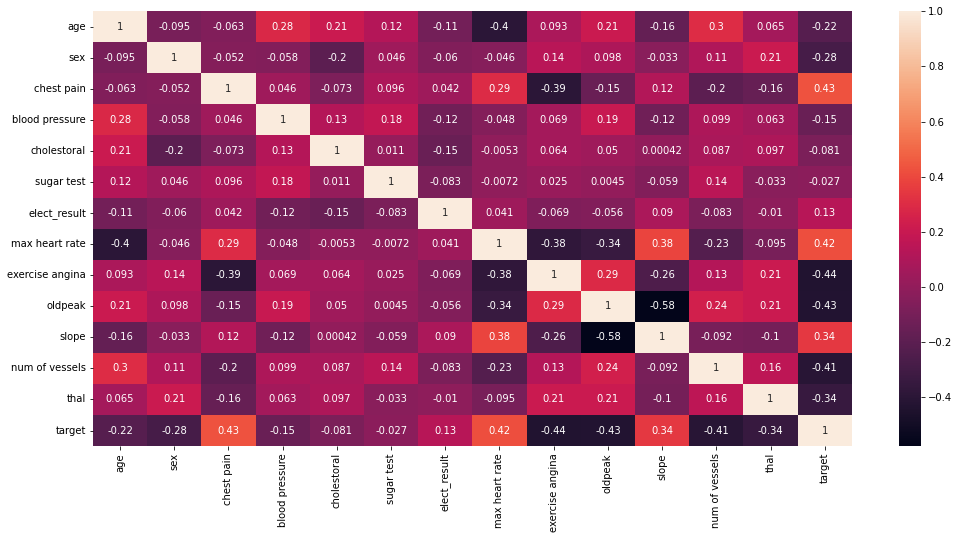

In [14]:
#find Correlation Matrix and drow it
plt.figure(figsize=(17,8))
sns.heatmap(data.corr(),annot=True) 

In [15]:
data.columns

Index(['age', 'sex', 'chest pain', 'blood pressure', 'cholestoral',
       'sugar test', 'elect_result', 'max heart rate', 'exercise angina',
       'oldpeak', 'slope', 'num of vessels', 'thal', 'target'],
      dtype='object')

In [16]:
data

,age,sex,chest pain,blood pressure,cholestoral,sugar test,elect_result,max heart rate,exercise angina,oldpeak,slope,num of vessels,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


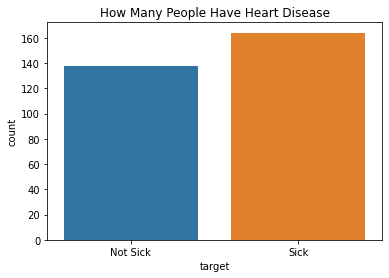

In [17]:
# How Many People Have Heart Disease, And How Many Don't Have Heart Disease
sns.countplot(x='target',data=data)
plt.xticks([0,1],['Not Sick','Sick'])
plt.title("How Many People Have Heart Disease")
plt.show()

In [18]:

data.target.value_counts()

1    164
0    138
Name: target, dtype: int64

In [19]:
#Find Count of  Male & Female in this Datase
data.sex.value_counts()

1    206
0     96
Name: sex, dtype: int64

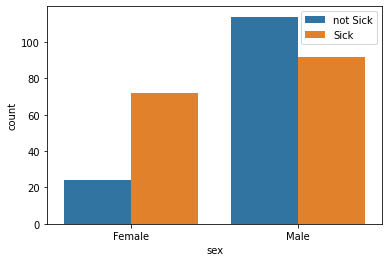

In [20]:
#Find Count of  Male & Female in this Datase

sns.countplot(x='sex',hue="target",data=data)
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['not Sick','Sick'])
plt.show()


In [21]:
data.columns

Index(['age', 'sex', 'chest pain', 'blood pressure', 'cholestoral',
       'sugar test', 'elect_result', 'max heart rate', 'exercise angina',
       'oldpeak', 'slope', 'num of vessels', 'thal', 'target'],
      dtype='object')

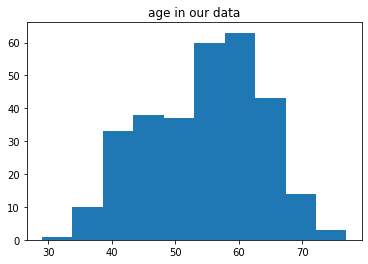

In [22]:
#Check Age Distribution In The Dataset
plt.hist(data['age'])
plt.title ("age in our data")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


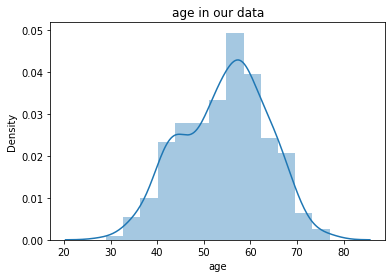

In [23]:
sns.distplot(data['age'])
plt.title ("age in our data")
plt.show()

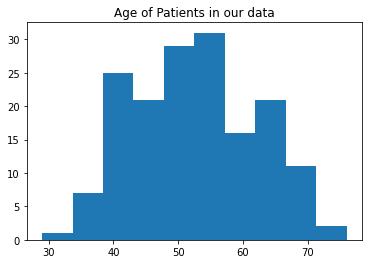

In [24]:
#Check Age Distribution of Patients In The Dataset
age_sick=data[data['target']==1]['age']

plt.hist([age_sick])
plt.title ("Age of Patients in our data")
plt.show()

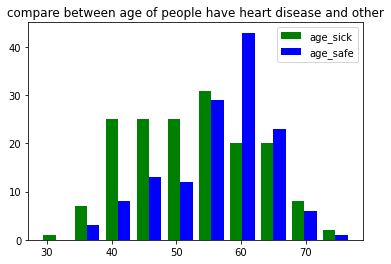

In [25]:
#Compare between age of people have heart disease and other
age_sick=data[data['target']==1]['age']
age_safe=data[data['target']==0]['age']
plt.hist([age_sick,age_safe],histtype='bar',align='mid',color=['g','b'],label=['age_sick','age_safe'] )
plt.title ("compare between age of people have heart disease and other")
plt.legend()
plt.show()

In [26]:
data.columns

Index(['age', 'sex', 'chest pain', 'blood pressure', 'cholestoral',
       'sugar test', 'elect_result', 'max heart rate', 'exercise angina',
       'oldpeak', 'slope', 'num of vessels', 'thal', 'target'],
      dtype='object')

In [27]:
#Check Chest Pain Type
data["chest pain"].unique()

array([0, 1, 2, 3])

In [28]:
#Find Count of Chest Pain in this Dataset
data["chest pain"].value_counts()

0    143
2     86
1     50
3     23
Name: chest pain, dtype: int64

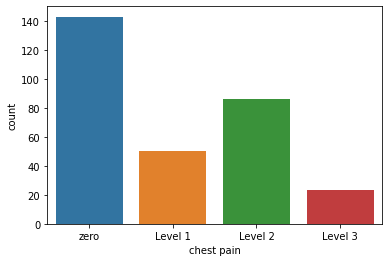

In [29]:
#drow Chest Pain level
sns.countplot(x='chest pain',data=data)
plt.xticks([0,1,2,3],['zero','Level 1','Level 2','Level 3'])
plt.show()

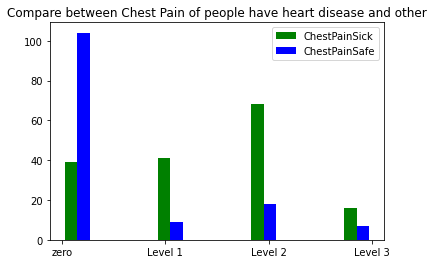

In [30]:
#Show The Chest Pain Distribution As Per Target Variable
#Compare between age of people have heart disease and other
ChestPainSick=data[data['target']==1]['chest pain']
ChestPainSafe=data[data['target']==0]['chest pain']
plt.hist([ChestPainSick,ChestPainSafe],histtype='bar',align='mid',color=['g','b'],label=['ChestPainSick','ChestPainSafe'] )
plt.xticks([0,1,2,3],['zero','Level 1','Level 2','Level 3'])
plt.title ("Compare between Chest Pain of people have heart disease and other")
plt.legend()
plt.show()

In [31]:
data.columns

Index(['age', 'sex', 'chest pain', 'blood pressure', 'cholestoral',
       'sugar test', 'elect_result', 'max heart rate', 'exercise angina',
       'oldpeak', 'slope', 'num of vessels', 'thal', 'target'],
      dtype='object')

In [32]:
#Show Fasting Blood Sugar Distribution According To Target Variable
data["sugar test"].unique()


array([0, 1])

In [33]:
data["sugar test"].value_counts()

0    257
1     45
Name: sugar test, dtype: int64

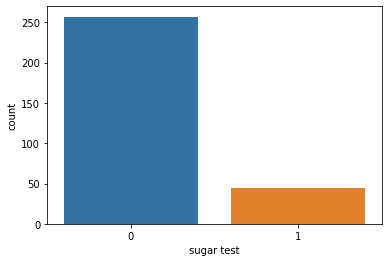

In [34]:
#Show Fasting Blood Sugar Distribution in our data
sns.countplot(x='sugar test',data=data)
#plt.xticks([0,1,],['zero','Level 1','Level 2','Level 3'])
plt.show()

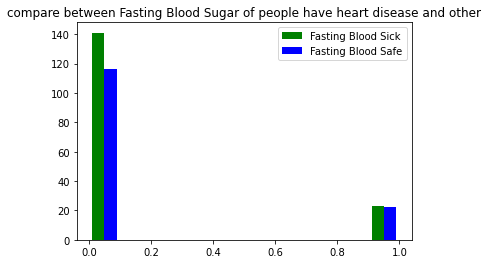

In [35]:
#Show Fasting Blood Sugar Distribution According To Target Variable
fastingBloodSick=data[data['target']==1]['sugar test']
fastingBloodSafe=data[data['target']==0]['sugar test']
plt.hist([fastingBloodSick,fastingBloodSafe],histtype='bar',align='mid',color=['g','b'],label=['Fasting Blood Sick','Fasting Blood Safe'] )
#plt.xticks([0,1,2,3],['zero','Level 1','Level 2','Level 3'])
plt.title ("compare between Fasting Blood Sugar of people have heart disease and other")
plt.legend()
plt.show()

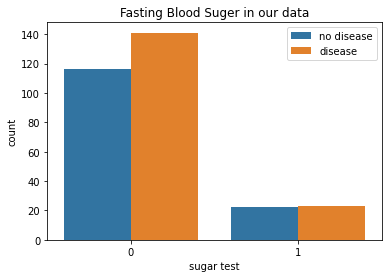

In [36]:
sns.countplot(x='sugar test',hue="target",data=data)
plt.title ("Fasting Blood Suger in our data")
plt.legend(labels=["no disease" ,"disease"])
plt.show()


In [37]:
data.columns

Index(['age', 'sex', 'chest pain', 'blood pressure', 'cholestoral',
       'sugar test', 'elect_result', 'max heart rate', 'exercise angina',
       'oldpeak', 'slope', 'num of vessels', 'thal', 'target'],
      dtype='object')

In [38]:
data['blood pressure']

0      125
1      140
2      145
3      148
4      138
      ... 
723    120
733    108
739    128
843    160
878    120
Name: blood pressure, Length: 302, dtype: int64

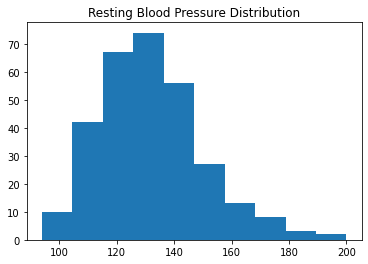

In [39]:
# Check Resting Blood Pressure Distribution
plt.hist(data['blood pressure'])
plt.title ("Resting Blood Pressure Distribution")
plt.show()

<AxesSubplot:>

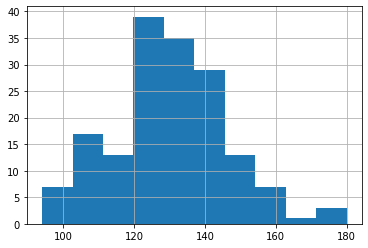

In [40]:
# Check Resting Blood Pressure Distribution of the Patients

BPofPatients=data[data['target']==1]['blood pressure']
BPofPatients.hist()

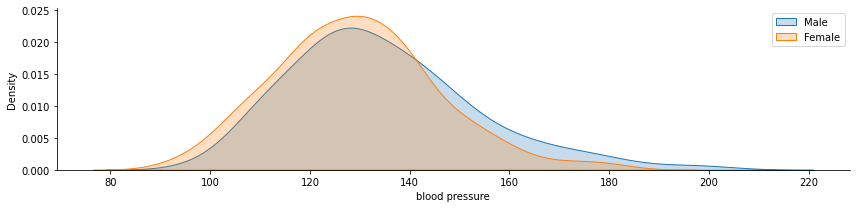

In [41]:
#Compare Resting Blood Pressure As Per Sex Column
g=sns.FacetGrid(data,hue="target",aspect=4)
g.map(sns.kdeplot,'blood pressure',shade=True)
plt.legend(labels=["Male" ,"Female"])


In [42]:

data

,age,sex,chest pain,blood pressure,cholestoral,sugar test,elect_result,max heart rate,exercise angina,oldpeak,slope,num of vessels,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
